In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Đọc file CSV
df = pd.read_csv('dataset.csv')

# Xem thông tin tổng quan
print(df.info())
print(df.describe())
print(df.head())

# Kiểm tra giá trị thiếu
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12159 entries, 0 to 12158
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _start       12159 non-null  object 
 1   _stop        12159 non-null  object 
 2   _time        12159 non-null  object 
 3   gas          12159 non-null  int64  
 4   humidity     12159 non-null  int64  
 5   temperature  12159 non-null  float64
dtypes: float64(1), int64(2), object(3)
memory usage: 570.1+ KB
None
                gas      humidity   temperature
count  12159.000000  12159.000000  12159.000000
mean      25.456041     68.934945     31.341574
std       16.157160      7.684473      4.670614
min        0.000000      0.000000      0.000000
25%       21.000000     67.000000     30.300000
50%       25.000000     69.000000     32.000000
75%       30.000000     73.000000     34.600000
max      859.000000     80.000000     37.600000
                 _start                         _stop  

   gas  humidity  temperature
0   31        69         31.7
1   24        69         31.8
2   31        69         31.8
3   22        70         31.4
4   31        69         31.7
                gas      humidity   temperature
count  12159.000000  12159.000000  12159.000000
mean      25.456041     68.934945     31.341574
std       16.157160      7.684473      4.670614
min        0.000000      0.000000      0.000000
25%       21.000000     67.000000     30.300000
50%       25.000000     69.000000     32.000000
75%       30.000000     73.000000     34.600000
max      859.000000     80.000000     37.600000
gas            0
humidity       0
temperature    0
dtype: int64


d:\py\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


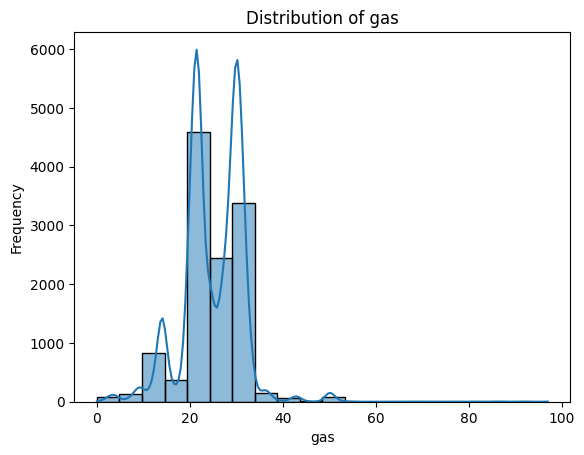

d:\py\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


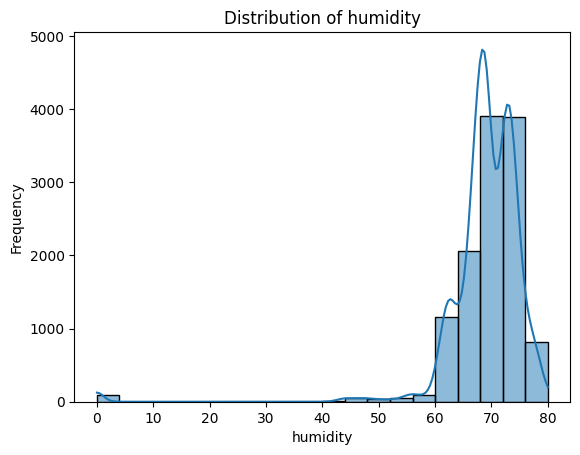

d:\py\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


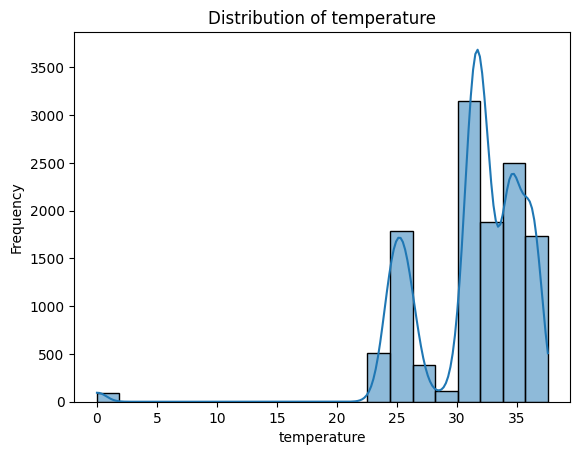

In [3]:
# Loại bỏ các cột thời gian nếu tồn tại
cols_to_drop = [col for col in ['_start', '_stop', '_time'] if col in df.columns]
df_temp = df.drop(columns=cols_to_drop)
print(df_temp.head())

# Thống kê mô tả các cột số
print(df_temp.describe())

# Kiểm tra giá trị thiếu
print(df_temp.isnull().sum())

# Vẽ histogram cho các cột số, riêng cột gas phóng lớn
for col in df_temp.columns:
    if col == 'gas':
        # Chỉ lấy giá trị gas nhỏ hơn 100
        data = df_temp[col][df_temp[col] < 100].dropna()
    else:
        data = df_temp[col].dropna()
    sns.histplot(data, kde=True, bins=20)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

                  gas  humidity  temperature
gas          1.000000  0.134678      0.14426
humidity     0.134678  1.000000      0.57237
temperature  0.144260  0.572370      1.00000


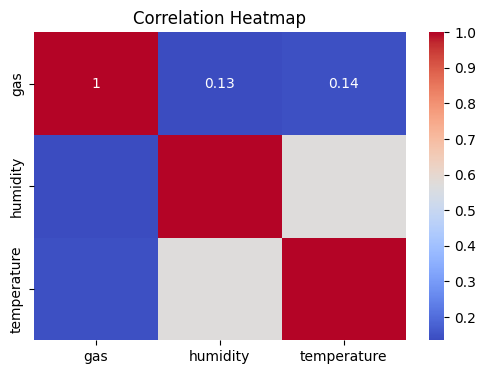

d:\py\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\py\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
d:\py\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


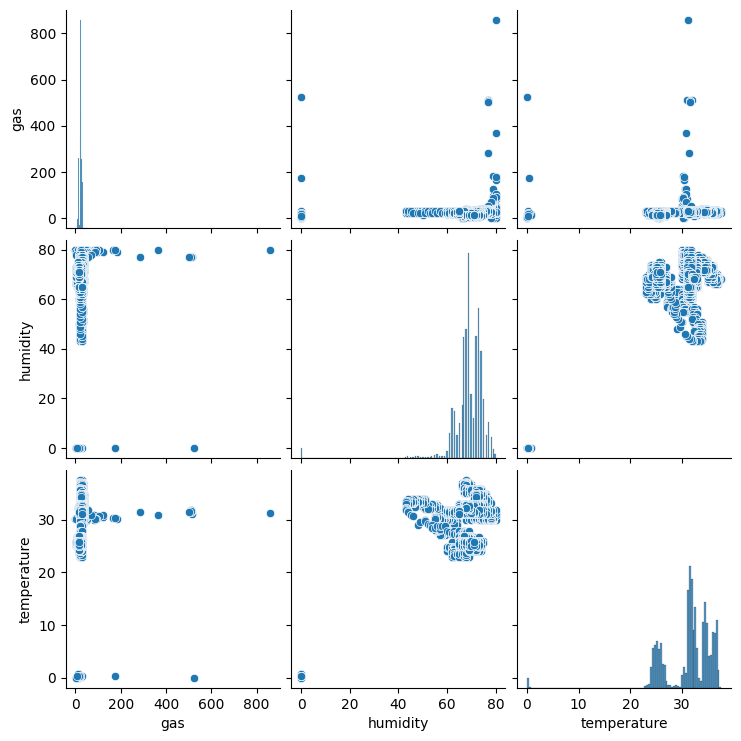

In [5]:
# Mối quan hệ giữa các cột số
# Ma trận tương quan
print(df_temp.corr())

# Vẽ heatmap tương quan
plt.figure(figsize=(6, 4))
sns.heatmap(df_temp.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Vẽ scatter plot giữa các cặp biến
sns.pairplot(df_temp)
plt.show()

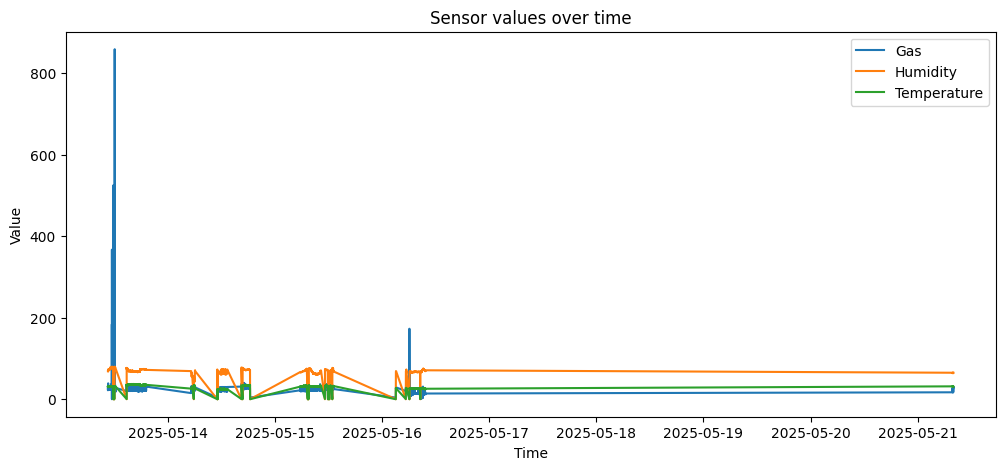

In [6]:
# Phân tích xu hướng theo thời gian, chuyển đổi thời gian an toàn
df_time = df.copy()
df_time['_time'] = pd.to_datetime(df_time['_time'], errors='coerce')

# Loại bỏ timezone nếu có
if df_time['_time'].dt.tz is not None:
    df_time['_time'] = df_time['_time'].dt.tz_convert(None)

plt.figure(figsize=(12, 5))
plt.plot(df_time['_time'], df_time['gas'], label='Gas')
plt.plot(df_time['_time'], df_time['humidity'], label='Humidity')
plt.plot(df_time['_time'], df_time['temperature'], label='Temperature')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Sensor values over time')
plt.show()

Trục X: Thời gian đo (ngày, giờ).<br>
Trục Y: Giá trị đo được của từng cảm biến.<br>
Đường màu xanh (Gas): Nồng độ khí gas theo thời gian.<br>
Đường màu cam (Humidity): Độ ẩm theo thời gian.<br>
Đường màu xanh lá (Temperature): Nhiệt độ theo thời gian.


Nhận xét từ biểu đồ:
Có một số điểm giá trị gas rất cao (outlier), vượt xa so với các giá trị còn lại.<br>
Đa số các giá trị gas, humidity, temperature nằm ở mức thấp và ổn định.<br>
Độ ẩm và nhiệt độ biến động nhẹ, không có giá trị bất thường lớn như gas.

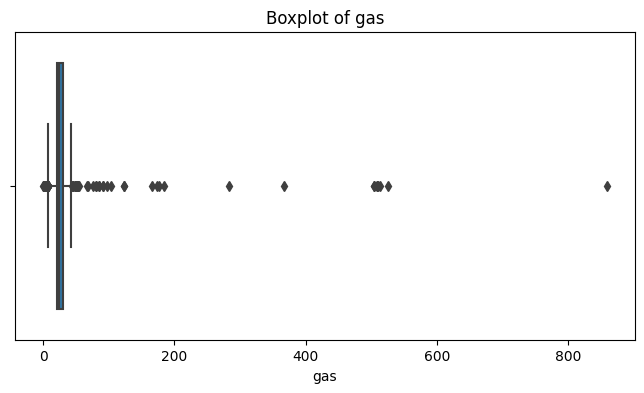

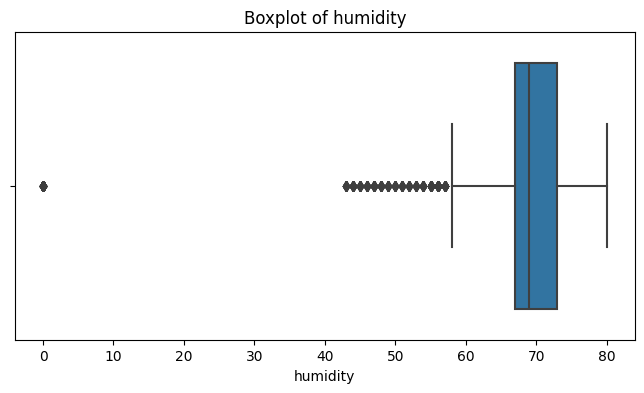

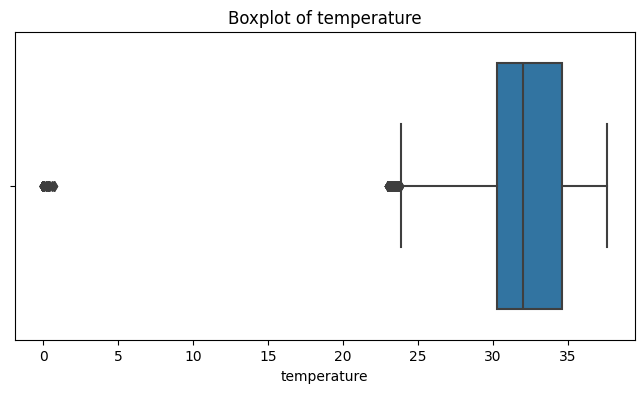

In [7]:
# Phát hiện bất thường
# Boxplot để phát hiện outlier
for col in df_temp.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df_temp[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

+ Boxplot của temperature (nhiệt độ):<br>
Đa số giá trị nhiệt độ nằm trong khoảng 30–36°C.
Có một số điểm nhiệt độ rất thấp (gần 0°C), đây là các giá trị bất thường (outlier).


+ Boxplot của humidity (độ ẩm):<br>
Đa số giá trị độ ẩm nằm trong khoảng 65–80%.
Có nhiều điểm độ ẩm thấp bất thường (gần 0% hoặc 40–60%), đây là các outlier.


+ Boxplot của gas (nồng độ khí gas):<br>
Phần lớn giá trị gas tập trung ở mức thấp (dưới 50).
Có nhiều điểm gas rất cao (từ 100 đến hơn 800), đây là các giá trị bất thường (outlier).

Linear Regression RMSE: 6.158390213206479 R2: 0.13039184694360284
Random Forest RMSE: 4.325340987418515 R2: 0.5710270603232446
SVR RMSE: 5.725778068616045 R2: 0.248276344186243


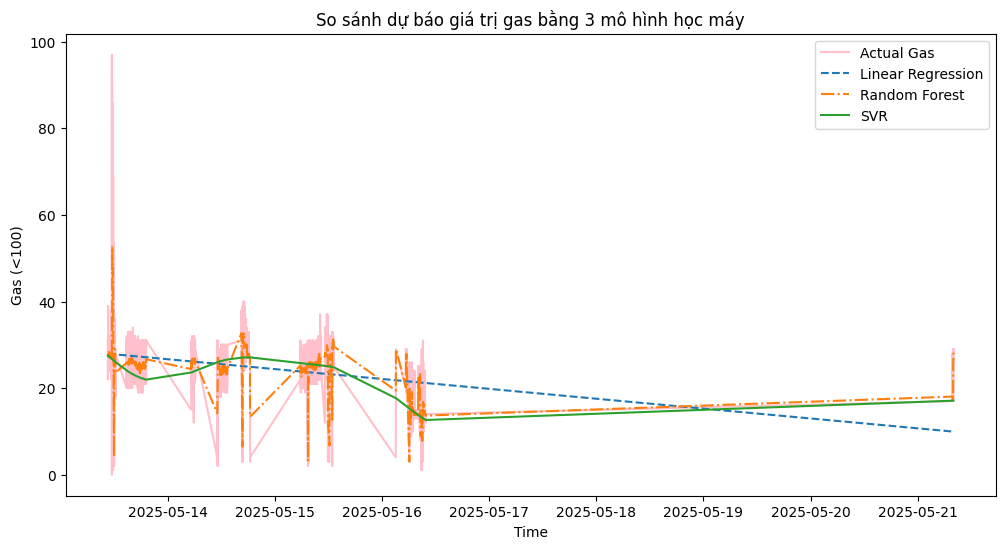

In [8]:
# dự báo giá trị gas
# Ví dụ dự báo giá trị gas bằng Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Chuẩn bị dữ liệu thời gian
df_time = df.copy()
df_time['_time'] = pd.to_datetime(df_time['_time'], errors='coerce', format='mixed')
df_time['timestamp'] = df_time['_time'].astype(np.int64) // 10**9

# Lọc các giá trị gas < 100
mask = df_time['gas'] < 100
X = df_time.loc[mask, ['timestamp']]
y = df_time.loc[mask, 'gas']

# Linear Regression
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)
y_pred_rf = rf.predict(X)

# Support Vector Regression
svr = SVR()
svr.fit(X, y)
y_pred_svr = svr.predict(X)

# Đánh giá mô hình
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y, y_pred_lr)), "R2:", r2_score(y, y_pred_lr))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y, y_pred_rf)), "R2:", r2_score(y, y_pred_rf))
print("SVR RMSE:", np.sqrt(mean_squared_error(y, y_pred_svr)), "R2:", r2_score(y, y_pred_svr))

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))
plt.plot(df_time.loc[mask, '_time'], y, label='Actual Gas', color='pink')
plt.plot(df_time.loc[mask, '_time'], y_pred_lr, label='Linear Regression', linestyle='--')
plt.plot(df_time.loc[mask, '_time'], y_pred_rf, label='Random Forest', linestyle='-.')
plt.plot(df_time.loc[mask, '_time'], y_pred_svr, label='SVR', linestyle='solid')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Gas (<100)')
plt.title('So sánh dự báo giá trị gas bằng 3 mô hình học máy')
plt.show()

In [23]:
import pandas as pd

# Tạo bảng so sánh kết quả
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'SVR'],
    'RMSE': [
        np.sqrt(mean_squared_error(y, y_pred_lr)),
        np.sqrt(mean_squared_error(y, y_pred_rf)),
        np.sqrt(mean_squared_error(y, y_pred_svr))
    ],
    'R2': [
        r2_score(y, y_pred_lr),
        r2_score(y, y_pred_rf),
        r2_score(y, y_pred_svr)
    ]
})

print(results)

               Model      RMSE        R2
0  Linear Regression  6.158390  0.130392
1      Random Forest  4.325341  0.571027
2                SVR  5.725778  0.248276


**Kết luận:**  
- **Random Forest** là mô hình dự báo tốt nhất cho dữ liệu gas trong trường hợp này, vì có giá trị **RMSE nhỏ nhất** (4.33) và **R2 lớn nhất** (0.57).
- Điều này cho thấy Random Forest phù hợp với dữ liệu cảm biến gas có nhiều biến động và tính phi tuyến, giúp dự báo chính xác hơn so với Linear Regression và SVR.

Linear Regression RMSE: 4.6599106779341986 R2: 0.004495986740484237
Random Forest RMSE: 1.7368552423703376 R2: 0.8617022614506737
SVR RMSE: 4.710266933103988 R2: -0.01713563497024606


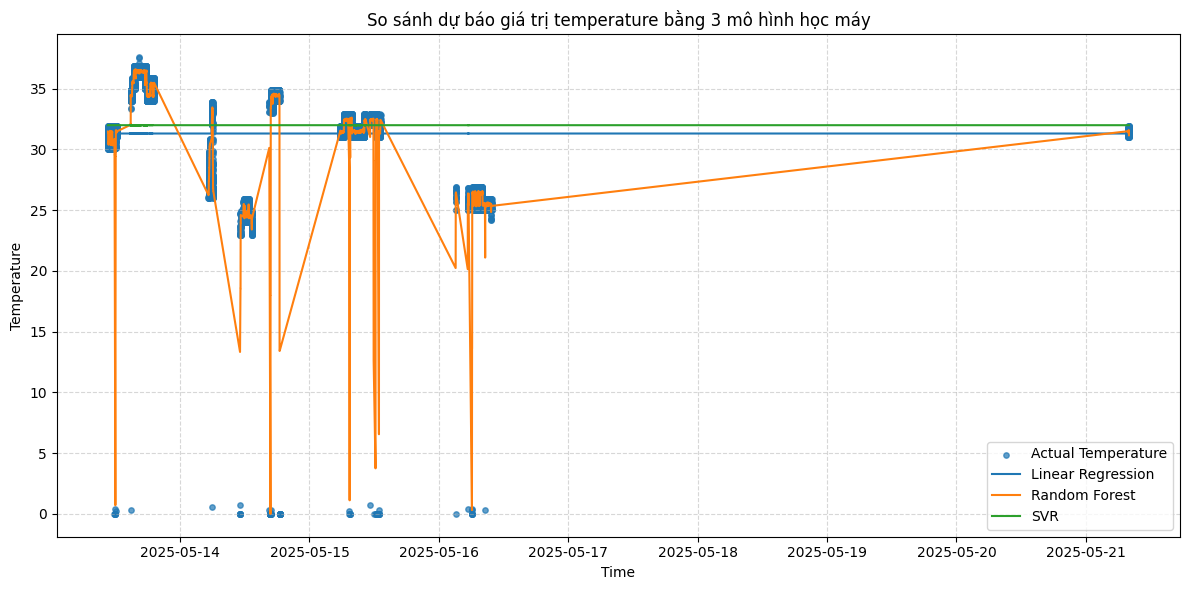

In [36]:
# Dự báo giá trị temperature theo thời gian bằng 3 mô hình học máy

# Lọc các giá trị temperature hợp lệ (không bị thiếu)
mask_temp = df_time['temperature'].notnull()
X_temp = df_time.loc[mask_temp, ['timestamp']]
y_temp = df_time.loc[mask_temp, 'temperature']

# Linear Regression
lr_temp = LinearRegression()
lr_temp.fit(X_temp, y_temp)
y_pred_lr_temp = lr_temp.predict(X_temp)

# Random Forest
rf_temp = RandomForestRegressor(n_estimators=100, random_state=42)
rf_temp.fit(X_temp, y_temp)
y_pred_rf_temp = rf_temp.predict(X_temp)

# Support Vector Regression
svr_temp = SVR()
svr_temp.fit(X_temp, y_temp)
y_pred_svr_temp = svr_temp.predict(X_temp)

# Đánh giá mô hình
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_temp, y_pred_lr_temp)), "R2:", r2_score(y_temp, y_pred_lr_temp))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_temp, y_pred_rf_temp)), "R2:", r2_score(y_temp, y_pred_rf_temp))
print("SVR RMSE:", np.sqrt(mean_squared_error(y_temp, y_pred_svr_temp)), "R2:", r2_score(y_temp, y_pred_svr_temp))

# Vẽ biểu đồ so sánh

df_time['_time'] = pd.to_datetime(df_time['_time'], errors='coerce')
if df_time['_time'].dt.tz is not None:
    df_time['_time'] = df_time['_time'].dt.tz_localize(None)

plt.figure(figsize=(12, 6))
plt.scatter(df_time.loc[mask_temp, '_time'], y_temp, label='Actual Temperature', s=15, alpha=0.7)
plt.plot(df_time.loc[mask_temp, '_time'], y_pred_lr_temp, label='Linear Regression')
plt.plot(df_time.loc[mask_temp, '_time'], y_pred_rf_temp, label='Random Forest')
plt.plot(df_time.loc[mask_temp, '_time'], y_pred_svr_temp, label='SVR')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('So sánh dự báo giá trị temperature bằng 3 mô hình học máy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [37]:
# Tạo bảng so sánh kết quả dự báo temperature
results_temp = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'SVR'],
    'RMSE': [
        np.sqrt(mean_squared_error(y_temp, y_pred_lr_temp)),
        np.sqrt(mean_squared_error(y_temp, y_pred_rf_temp)),
        np.sqrt(mean_squared_error(y_temp, y_pred_svr_temp))
    ],
    'R2': [
        r2_score(y_temp, y_pred_lr_temp),
        r2_score(y_temp, y_pred_rf_temp),
        r2_score(y_temp, y_pred_svr_temp)
    ]
})

print(results_temp)

               Model      RMSE        R2
0  Linear Regression  4.659911  0.004496
1      Random Forest  1.736855  0.861702
2                SVR  4.710267 -0.017136


**Kết luận:**  
- **Random Forest** là mô hình dự báo tốt nhất cho dữ liệu temperature trong trường hợp này, vì có **RMSE nhỏ nhất** (1.74) và **R2 lớn nhất** (0.86).
- Điều này cho thấy Random Forest phù hợp với dữ liệu cảm biến temperature, giúp dự báo chính xác hơn so với Linear Regression và SVR.

Linear Regression RMSE: 7.5719429003869 R2: 0.028993301452364784
Random Forest RMSE: 4.054811263329943 R2: 0.7215489539787205
SVR RMSE: 7.313219429837448 R2: 0.09421573046983145


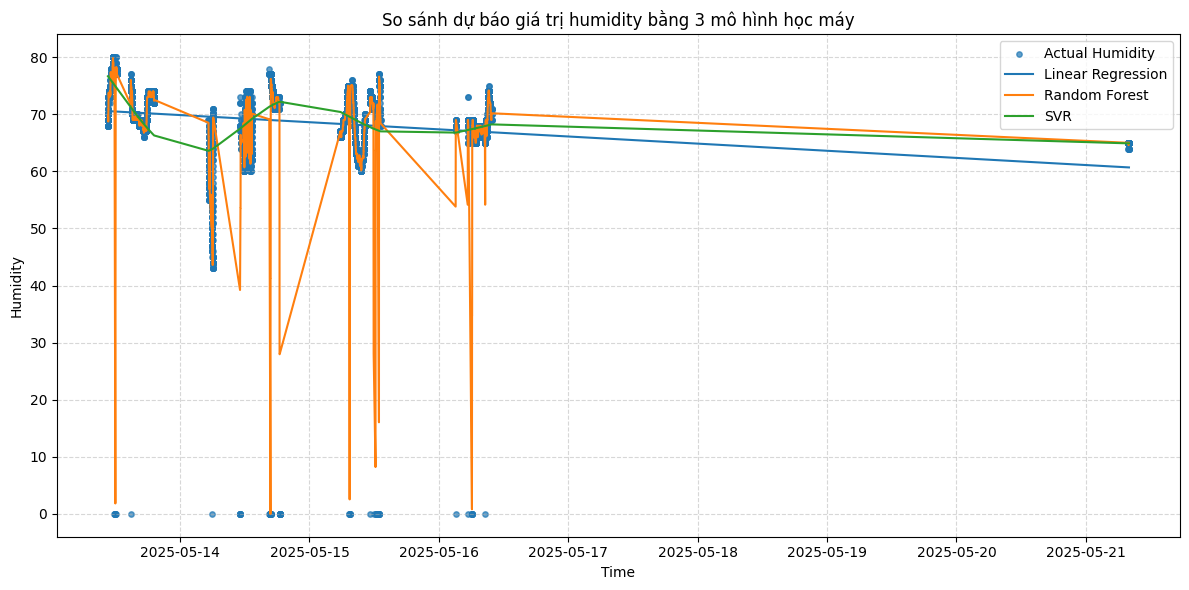

In [10]:
# Dự báo giá trị humidity theo thời gian bằng 3 mô hình học máy

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Đảm bảo cột _time là kiểu datetime không timezone
df_time['_time'] = pd.to_datetime(df_time['_time'], errors='coerce')
if df_time['_time'].dt.tz is not None:
    df_time['_time'] = df_time['_time'].dt.tz_localize(None)
df_time['timestamp'] = df_time['_time'].astype(np.int64) // 10**9

# Lọc các giá trị humidity hợp lệ (không bị thiếu)
mask_hum = df_time['humidity'].notnull()
X_hum = df_time.loc[mask_hum, ['timestamp']]
y_hum = df_time.loc[mask_hum, 'humidity']

# Linear Regression
lr_hum = LinearRegression()
lr_hum.fit(X_hum, y_hum)
y_pred_lr_hum = lr_hum.predict(X_hum)

# Random Forest
rf_hum = RandomForestRegressor(n_estimators=100, random_state=42)
rf_hum.fit(X_hum, y_hum)
y_pred_rf_hum = rf_hum.predict(X_hum)

# Support Vector Regression
svr_hum = SVR()
svr_hum.fit(X_hum, y_hum)
y_pred_svr_hum = svr_hum.predict(X_hum)

# Đánh giá mô hình
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_hum, y_pred_lr_hum)), "R2:", r2_score(y_hum, y_pred_lr_hum))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_hum, y_pred_rf_hum)), "R2:", r2_score(y_hum, y_pred_rf_hum))
print("SVR RMSE:", np.sqrt(mean_squared_error(y_hum, y_pred_svr_hum)), "R2:", r2_score(y_hum, y_pred_svr_hum))

# Vẽ biểu đồ so sánh
plt.figure(figsize=(12, 6))
plt.scatter(df_time.loc[mask_hum, '_time'], y_hum, label='Actual Humidity', s=15, alpha=0.7)
plt.plot(df_time.loc[mask_hum, '_time'], y_pred_lr_hum, label='Linear Regression')
plt.plot(df_time.loc[mask_hum, '_time'], y_pred_rf_hum, label='Random Forest')
plt.plot(df_time.loc[mask_hum, '_time'], y_pred_svr_hum, label='SVR')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.title('So sánh dự báo giá trị humidity bằng 3 mô hình học máy')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [11]:
# Tạo bảng so sánh kết quả dự báo humidity
results_hum = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'SVR'],
    'RMSE': [
        np.sqrt(mean_squared_error(y_hum, y_pred_lr_hum)),
        np.sqrt(mean_squared_error(y_hum, y_pred_rf_hum)),
        np.sqrt(mean_squared_error(y_hum, y_pred_svr_hum))
    ],
    'R2': [
        r2_score(y_hum, y_pred_lr_hum),
        r2_score(y_hum, y_pred_rf_hum),
        r2_score(y_hum, y_pred_svr_hum)
    ]
})

print(results_hum)

               Model      RMSE        R2
0  Linear Regression  7.571943  0.028993
1      Random Forest  4.054811  0.721549
2                SVR  7.313219  0.094216


**Kết luận:**  
- **Random Forest** là mô hình dự báo tốt nhất cho dữ liệu humidity trong trường hợp này, vì có **RMSE nhỏ nhất** và **R2 lớn nhất** so với Linear Regression và SVR.
- Điều này cho thấy Random Forest phù hợp với dữ liệu cảm biến humidity, giúp dự báo chính xác hơn, đặc biệt khi dữ liệu có nhiều biến động hoặc quan hệ phi tuyến.